In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1384


<Axes: xlabel='Time'>

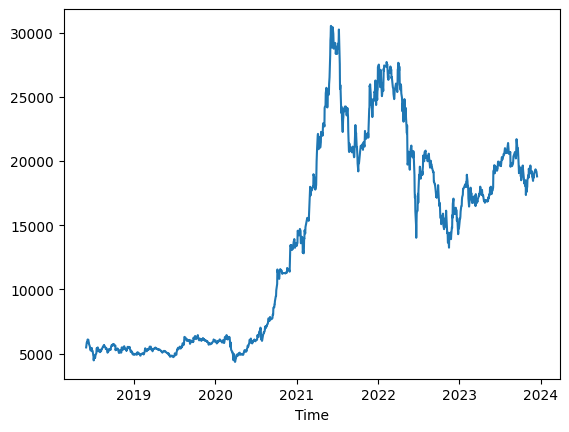

In [2]:
#2. Fetch data and visualize
VIB = stock_historical_data(symbol = "VIB", start_date="2018-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VIB['Close']))
VIB
VIB["Close"].plot()

In [3]:
VIB['Lag'] = np.arange(len(VIB.index))
VIB = VIB[['Close', 'Lag']]
VIB

VIB = pd.DataFrame(VIB)
VIB.set_index("Lag", inplace= True)
VIB

,Close
Lag,
0,5480
1,5880
2,5900
3,5880
4,6060
...,...
1379,19200
1380,19200
1381,19050


In [5]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.7 * len(VIB))
test_size = int(0.3 * len(VIB))

train_data = VIB[:train_size]
test_data = VIB[train_size:]

In [6]:
#4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)
y_pred

array([[24527.37901579],
       [24553.53684205],
       [24579.69466832],
       [24605.85249458],
       [24632.01032085],
       [24658.16814711],
       [24684.32597338],
       [24710.48379964],
       [24736.64162591],
       [24762.79945218],
       [24788.95727844],
       [24815.11510471],
       [24841.27293097],
       [24867.43075724],
       [24893.5885835 ],
       [24919.74640977],
       [24945.90423604],
       [24972.0620623 ],
       [24998.21988857],
       [25024.37771483],
       [25050.5355411 ],
       [25076.69336736],
       [25102.85119363],
       [25129.0090199 ],
       [25155.16684616],
       [25181.32467243],
       [25207.48249869],
       [25233.64032496],
       [25259.79815122],
       [25285.95597749],
       [25312.11380375],
       [25338.27163002],
       [25364.42945629],
       [25390.58728255],
       [25416.74510882],
       [25442.90293508],
       [25469.06076135],
       [25495.21858761],
       [25521.37641388],
       [25547.53424015],


In [8]:
# 6. 60 days prediction
last_index =  VIB.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[[35409.03474229]
 [35435.19256856]
 [35461.35039482]
 [35487.50822109]
 [35513.66604735]
 [35539.82387362]
 [35565.98169989]
 [35592.13952615]
 [35618.29735242]
 [35644.45517868]
 [35670.61300495]
 [35696.77083121]
 [35722.92865748]
 [35749.08648375]
 [35775.24431001]
 [35801.40213628]
 [35827.55996254]
 [35853.71778881]
 [35879.87561507]
 [35906.03344134]
 [35932.1912676 ]
 [35958.34909387]
 [35984.50692014]
 [36010.6647464 ]
 [36036.82257267]
 [36062.98039893]
 [36089.1382252 ]
 [36115.29605146]
 [36141.45387773]
 [36167.611704  ]
 [36193.76953026]
 [36219.92735653]
 [36246.08518279]
 [36272.24300906]
 [36298.40083532]
 [36324.55866159]
 [36350.71648785]
 [36376.87431412]
 [36403.03214039]
 [36429.18996665]
 [36455.34779292]
 [36481.50561918]
 [36507.66344545]
 [36533.82127171]
 [36559.97909798]
 [36586.13692425]
 [36612.29475051]
 [36638.45257678]
 [36664.61040304]
 [36690.76822931]
 [36716.92605557]
 [36743.08388184]
 [36769.24170811]

In [9]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 12153.03060914534
Testing MAPE: 65.18655762869497
Testing MAE: 11618.055800901679


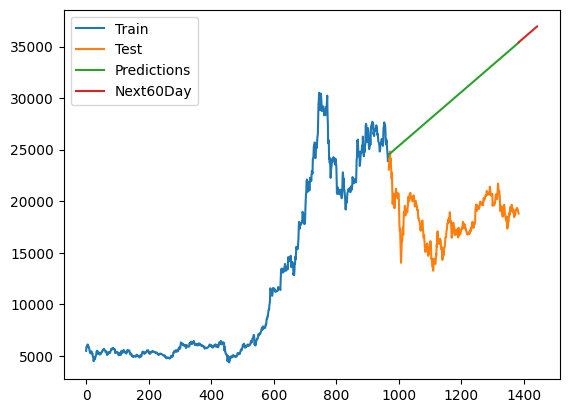

In [10]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()